In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error, mean_absolute_error

from mpl_toolkits import mplot3d

import plotly.express as px

import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import correlation, cosine
from scipy.stats import describe
from scipy.sparse.linalg import svds

## Method to get Principal Components.

In [2]:
def get_pca(data,n):
    pca = PCA(n_components=n)
    principalComponents = pca.fit_transform(data)
    principalComponents = pd.DataFrame(data = principalComponents)
    return(pca,principalComponents)

## Method to plot Pareto of the Principal Components.

In [3]:
def plot_pareto(pca, principalComponents):
    
    plt.bar(principalComponents.columns,pca.explained_variance_ratio_)
    df = pd.DataFrame({'var':pca.explained_variance_ratio_,
                       'PC':principalComponents.columns})
    df["cummulative"] = df["var"].cumsum()/df["var"].sum()*100
    
    
    fig, ax = plt.subplots()
    ax.bar(df['PC'], df["var"])
    ax2 = ax.twinx()
    ax2.plot(df['PC'], df["cummulative"], color="C1", marker="D")
    ax2.yaxis.set_major_formatter(PercentFormatter())

    ax.tick_params(axis="y", colors="C0")
    ax2.tick_params(axis="y", colors="C1")
    plt.show()

### - Importing the Useritem Matrix and replacing NA,
### - Replacing ratings with 1 (indicating product bought)
### - Applying PCA for dimension reduction.

In [21]:
# Importing the Useritem Matrix.
useritem = pd.read_csv('/Users/abdulrehman/Desktop/usml/data/AMAZON_FASHION_user_itemset.csv',index_col=0)
meta_data = pd.read_json('/Users/abdulrehman/Desktop/usml/data/meta_AMAZON_FASHION.json',lines=True)
ratings_df = pd.read_json('/Users/abdulrehman/Desktop/usml/data/AMAZON_FASHION.json',lines=True)

# Replacing NA with 0 and Replacing ratings with 1 (indicating product bought).
# data = useritem.loc[:, useritem.columns != 'reviewerID']
data = useritem.fillna(0)
# data = data.T
# data = data.div(5)

# Applying PCA for dimension reduction.
pca , principalComponents = get_pca(data,25)
data

,B000AO7PY0,B000BD7SGK,B000EE1NNA,B000ER9V68,B000JOOR7O,B000K2PJ4K,B000KPIHQ4,B000NBIMG0,B000NGJ41W,B000V0IBDM,...,B01HBACQXA,B01HBJW7DU,B01HC6I664,B01HC7565W,B01HD09GLI,B01HEBZTI0,B01HGIDX5M,B01HH3WJVA,B01HI84VBA,B01HJEO9SS
reviewerID,,,,,,,,,,,,,,,,,,,,,
A2ZSX6R0TL8ET6,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AWBGHDHH7E51F,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAC2BU2V9X95K,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1FY4RR0LGCJ0Q,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A3Y15MFKAKJR3,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A3VAF5GP6K65VU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1TSKC7FB8KOMJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A286YLFNRTV13C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### - Plotting pareto to visualise the principal components.

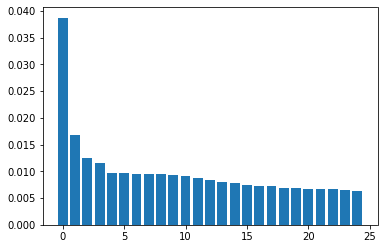

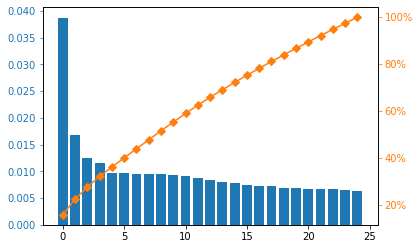

In [68]:
plot_pareto(pca, principalComponents)

### Plotting the Dendrogram with cosine distance and single linkage.

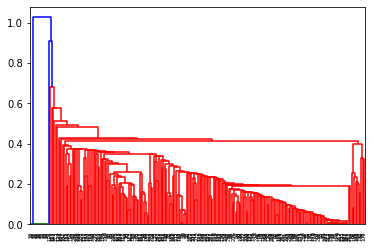

In [69]:
dendogram = sch.dendrogram(sch.linkage(principalComponents,method='single', metric="cosine"))

### Plotting the Dendrogram with cosine distance and complete linkage.

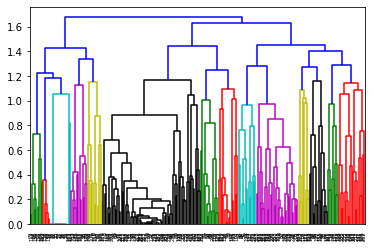

In [70]:
dendogram = sch.dendrogram(sch.linkage(principalComponents,method='complete', metric="cosine"))

### Plotting the Dendrogram with cosine distance and average linkage.

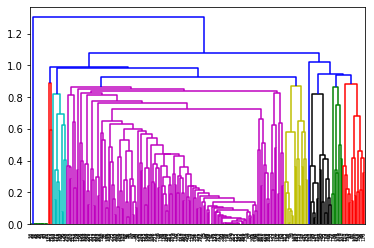

In [71]:
dendogram = sch.dendrogram(sch.linkage(principalComponents,method='average', metric="cosine"))

##### From the dendrogram we can see that cosine distanc with Complete linkage gives the best reults.
##### We can see that 10 looks like a good value for n_clusters.
##### We now run Agglomerative Clustering and get labels to cluster similar users.

In [5]:
aggclust = AgglomerativeClustering(10, affinity='cosine', linkage='complete')

In [6]:
hc = aggclust.fit_predict(principalComponents)

In [7]:
unique_elements, counts_elements = np.unique(hc, return_counts=True)
print("Frequency of unique values in the labels array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values in the labels array:
[[ 0  1  2  3  4  5  6  7  8  9]
 [12 28 81 15 20 30 21 12 11 10]]


In [9]:
# data = data.div(0.2)
data['labels'] = hc


In [10]:
groups = [x for _, x in data.groupby(data['labels'])]

In [11]:
#in each group remove columns of items which none of the customers from that group bought.
for i in range(len(groups)):
    groups[i] = groups[i].loc[:, (groups[i] != 0.0).any(axis=0)]
    groups[i] = groups[i].loc[:, groups[i].columns != 'labels']
#     groups[i] = groups[i].T

In [12]:
groups

[                B000NGJ41W  B0097B5XV4  B00BM27TKO  B00CQNT23A  B00D023ZFM  \
 reviewerID                                                                   
 A2T2ZJ8NQ7PP5J         5.0         0.0         0.0         0.0         0.0   
 A1AHIS29D50G9D         0.0         4.0         0.0         4.0         0.0   
 A27WGWACHNQUR4         0.0         0.0         4.0         0.0         0.0   
 A38HWKGV6ZI6HW         0.0         0.0         0.0         0.0         5.0   
 A2QHRRGSHKUZ6I         0.0         0.0         0.0         0.0         0.0   
 A28F5OASAOTAI8         0.0         0.0         0.0         0.0         0.0   
 AQR8WLMVKCE6V          0.0         0.0         0.0         0.0         0.0   
 AKMEY1BSHSDG7          0.0         0.0         0.0         0.0         0.0   
 A1COJ8DR51JJUR         0.0         0.0         0.0         0.0         0.0   
 A1C1UK1VCQ6ZLU         0.0         0.0         0.0         0.0         0.0   
 A20ZIV7RG5L6NQ         0.0         0.0         0.0 

In [78]:
# R_df = groups[0]

R = R_df.values
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

U, sigma, Vt = svds(R_demeaned, k = 5)
sigma = np.diag(sigma)

all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [79]:
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = R_df.columns, index = R_df.index)
preds_df.head()

,B000AO7PY0,B000BD7SGK,B000EE1NNA,B000ER9V68,B000JOOR7O,B000K2PJ4K,B000KPIHQ4,B000NBIMG0,B000NGJ41W,B000V0IBDM,...,B01HBACQXA,B01HBJW7DU,B01HC6I664,B01HC7565W,B01HD09GLI,B01HEBZTI0,B01HGIDX5M,B01HH3WJVA,B01HI84VBA,B01HJEO9SS
reviewerID,,,,,,,,,,,,,,,,,,,,,
A2ZSX6R0TL8ET6,0.022422,0.022422,0.022422,0.022422,0.022422,0.022422,0.022422,0.022422,0.022422,0.022422,...,0.022479,0.022338,0.022509,0.022514,0.022485,0.022433,0.022482,0.022613,0.022483,0.022437
AWBGHDHH7E51F,0.033686,0.033686,0.033686,0.033686,0.033686,0.033686,0.033686,0.033686,0.033686,0.033686,...,0.034272,0.034189,0.034934,0.035121,0.034594,0.034698,0.034597,0.033707,0.034550,0.033851
AAC2BU2V9X95K,0.021357,0.021357,0.021357,0.021357,0.021357,0.021357,0.021357,0.021357,0.021357,0.021357,...,0.021641,0.021602,0.021949,0.022036,0.021788,0.021836,0.021788,0.021369,0.021767,0.021436
A1FY4RR0LGCJ0Q,0.015837,0.015837,0.015837,0.015837,0.015837,0.015837,0.015837,0.015837,0.015837,0.015837,...,0.016030,0.016003,0.016237,0.016296,0.016128,0.016161,0.016129,0.015845,0.016114,0.015890
A3Y15MFKAKJR3,0.013530,0.013530,0.013530,0.013530,0.013530,0.013530,0.013530,0.013530,0.013530,0.013530,...,0.013660,0.013663,0.013740,0.013768,0.013683,0.013702,0.013682,0.013535,0.013676,0.013558


In [80]:
preds_df.loc[ 'A1AHIS29D50G9D' , :]


B000AO7PY0    0.015243
B000BD7SGK    0.015243
B000EE1NNA    0.015243
B000ER9V68    0.015243
B000JOOR7O    0.015243
                ...   
B01HEBZTI0    0.015663
B01HGIDX5M    0.015619
B01HH3WJVA    0.015245
B01HI84VBA    0.015599
B01HJEO9SS    0.015311
Name: A1AHIS29D50G9D, Length: 2532, dtype: float64

In [65]:
def recommend_movies(preds_df, userID, movies_df, original_ratings_df, num_recommendations=1):
    
    # Get and sort the user's predictions
    sorted_user_predictions = preds_df.loc[userID , :].sort_values(ascending=False) # UserID starts at 1
    print(sorted_user_predictions)
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings_df[original_ratings_df.reviewerID == userID]
    user_full = (user_data.merge(movies_df, how = 'left', left_on = 'asin', right_on = 'asin').
                     sort_values(['overall'], ascending=False))

    print('User {0} has already rated {1} movies.'.format(userID, user_full.shape[0]))
    print('Recommending highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies_df[~movies_df['asin'].isin(user_full['asin'])].
         merge(pd.DataFrame(sorted_user_predictions), how = 'left',
               left_on = 'asin',
               right_index=True).
         rename(columns = {userID: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

In [81]:
already_rated, predictions = recommend_movies(preds_df, 'A1AHIS29D50G9D', meta_data, ratings_df, 4)

B00NJ31B7Q    0.022141
B010MR6Y8C    0.022141
B017OEV1HU    0.021424
B00ZDBVNIO    0.019765
B01FCWQ7V6    0.019619
                ...   
B00MIMOVB2   -0.029089
B00PJIPZGW   -0.036639
B00KREOWWG   -0.041066
B00KW4LCCE   -0.049931
B00KREP1HQ   -0.069117
Name: A1AHIS29D50G9D, Length: 2532, dtype: float64
User A1AHIS29D50G9D has already rated 10 movies.
Recommending highest 4 predicted ratings movies not already rated.


In [76]:
predictions

,title,image,brand,feature,rank,date,asin,description,price,also_view,also_buy,fit,details,similar_item,tech1
183882,HOT FROM HOLLYWOOD Women's Button Down Roll up...,[https://images-na.ssl-images-amazon.com/image...,NaN,[Package Dimensions:\n \n12...,"3,180,777inClothing,ShoesJewelry(",5 star,B01H410W0A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140415,Nike Kids Air Max 90 LTR White Blue Red Leathe...,[https://images-na.ssl-images-amazon.com/image...,NaN,[Product Dimensions:\n \n14...,"4,869,208inClothing,ShoesJewelry(",5 star,B01A1K9M7K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159833,SOJOS Classic Square Metal Frame Sunglasses fo...,[https://images-na.ssl-images-amazon.com/image...,NaN,[Product Dimensions:\n \n5....,"2,370,559inClothing,ShoesJewelry(",5 star,B01DI4J0FA,NaN,NaN,NaN,[B01LW02Y58],NaN,NaN,NaN,NaN
85587,Weixinbuy Toddler Kid Boy Cotton Polka Dots La...,NaN,Weixinbuy,NaN,"3,928,196inClothing,ShoesJewelry(",5 star,B00VY94R0A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
train = pd.read_csv('/Users/abdulrehman/Desktop/usml/data/train_user_itemset.csv',index_col=0)
R_df = train.fillna(0)

In [85]:
pre=np.where(R_df == 0, 0, preds_df) 
mean_absolute_error(pre, R_df)

0.018989189800287336

In [ ]:
def findksimilaritems(item, data, k):
    data=data.T
    model_knn = NearestNeighbors(metric = "cosine", algorithm = 'brute') 
    model_knn.fit(data)

    distances, indices = model_knn.kneighbors(data.iloc[item-1, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distances.flatten()
    indices = indices.flatten()
    for i in range(0, len(indices)):
        if indices[i]+1 == item:
            indices = np.delete(indices, i)
            similarities = np.delete(similarities, i)
            break
            
    return(similarities,indices)


In [ ]:
findksimilaritems(1, groups[0], 5)

In [ ]:
def predict_itembased(user, item, data, k):
    prediction= wtd_sum =0
    similarities, indices=findksimilaritems(item, data, k)
    
    for i in range(0, len(indices.flatten())):
        wtd_sum = wtd_sum + (data.iloc[user-1,indices.flatten()[i]] * (similarities[i]))
        
    prediction = wtd_sum/np.sum(similarities)-1
    
    return prediction

In [ ]:
predict_itembased(2, 2, groups[0], 5)

In [ ]:
sum_rmse = 0.0
sum_mae = 0.0
for i in range(1):
    users = groups[i].shape[0]
    items = groups[i].shape[1]
    pred = np.zeros((users, items))
    start=datetime.now()
    for j in range(users):
        for k in range(items):
            pred[j][k] = predict_itembased(j+1, k+1, groups[i], 5)
    print(datetime.now()-start)
#     MSE = mean_squared_error(pred, groups[i])
    MAE = mean_absolute_error(pred, groups[i])
    
#     sum_rmse = sum_rmse + MSE
    sum_mae = sum_mae + MAE

    print("MAE : {0}".format(MAE))
print('average MAE = ',(sum_mae/8))

In [ ]:
data = data.loc[:, data.columns != 'labels']
users = data.shape[0]
items = data.shape[1]
pred = np.zeros((users, items))
start=datetime.now()

for i in range(users):
    for j in range(items):
        pred[i][j] = predict_itembased(i+1, j+1, data, 5)
# MSE = mean_squared_error(pred, data)
print(datetime.now()-start)
MAE = mean_absolute_error(pred, data)

print("MAE : {0}".format(MAE))

In [ ]:
pre=np.where(real[0] != 0, 0, pred[0]) 

In [ ]:
real = np.array(groups[0])

In [ ]:
real[0]

In [ ]:
np.unique(pre)